<a href="https://colab.research.google.com/github/GwanMuk/AI_TEST/blob/master/MBCAI%EC%8B%9C%ED%97%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 패션 MNIST 데이터 셋 : 숫자대신 패션아이템으로 이루어짐
import tensorflow as tf

from tensorflow import keras

# MNIST 데이터 가져오기
from tensorflow import keras
(train_input, train_target),(test_input, test_target)=keras.datasets.fashion_mnist.load_data()

# 이미지의 픽셀 값이 0~155 범위에서 0~1사이로 변환 -> 전처리
train_scaled = train_input /255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [2]:
# 모델 훈련, 검증 , 테스트 자료 나누기
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target= train_test_split(
    train_scaled, train_target, test_size=0.2 , random_state=None
)

In [3]:
# 훈련데이터, 검증데이터, 테스트데이터
print(train_scaled.shape, train_target.shape)

print(val_scaled.shape, val_target.shape)

print(test_input.shape, test_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)
(10000, 28, 28) (10000,)


In [4]:
# 모델을 만드는 함수
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))  # 입력층
    model.add(keras.layers.Dense(100,activation='relu'))  # 은닉층
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [5]:
# 다중분류를 이용한 모델의 컴파일
model = model_fn()

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 모델 훈련하기
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

model.fit(train_scaled, train_target, epochs=10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7663 - loss: 0.6681
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8548 - loss: 0.4018
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8693 - loss: 0.3589
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8806 - loss: 0.3290
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8861 - loss: 0.3189
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8932 - loss: 0.2968
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8932 - loss: 0.2907
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8992 - loss: 0.2809
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9024 - loss: 0.2667
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9053 - loss: 0.2673


In [7]:
# 모델의 최적화
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# 모델의 과대적합을 막는 기법
model = model_fn(keras.layers.Dropout(0.3)) # 30% 정도 드롭아웃

In [9]:
# 모델 정보 요약 확인
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 모델 훈련하기
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7344 - loss: 0.7737 - val_accuracy: 0.8482 - val_loss: 0.4210
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8433 - loss: 0.4386 - val_accuracy: 0.8506 - val_loss: 0.4140
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8492 - loss: 0.4145 - val_accuracy: 0.8677 - val_loss: 0.3648
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8600 - loss: 0.3839 - val_accuracy: 0.8722 - val_loss: 0.3539
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8671 - loss: 0.3650 - val_accuracy: 0.8718 - val_loss: 0.3512
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8697 - loss: 0.3547 - val_accuracy: 0.8754 - val_loss: 0.3447
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8743 - loss: 0.3465 - val_accuracy: 0.8758 - val_loss: 0.3393
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8776 - loss: 0.3310 - 

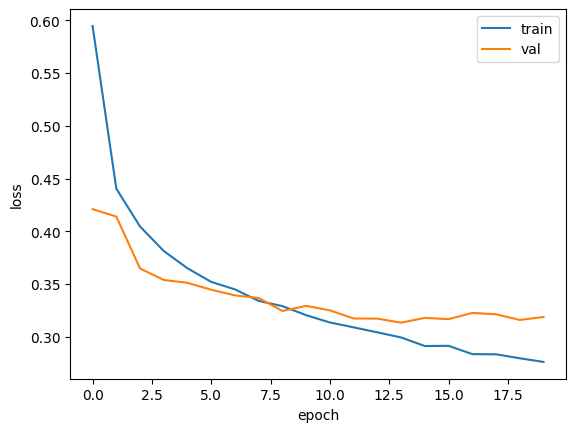

In [11]:
# 그래프로 출력해보기
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) # 훈련 손실율
plt.plot(history.history['val_loss']) # 검증 손실율
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [12]:
# 모델저장
model.save('model-whole.keras')

In [13]:
# 모델 불러오기 및 검증 정확도 측정 시작
model.load_weights('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8871 - loss: 0.3186


[0.31883034110069275, 0.8886666893959045]

In [15]:
# 모델을 불러와 테스트 점수 확인
model.load_weights('model-whole.keras')
model.evaluate(test_input, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8631 - loss: 61.1502


[66.00143432617188, 0.8598999977111816]